In [ ]:
#Question No.1       Dataset:- "Airlines+Data.xlsx"

In [ ]:
#Prepare a document for each model
#Explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
#Read the file [read_excel]
Airlines = pd.read_excel("Airlines+Data.xlsx")
Airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
Airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
Airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
Airlines.head() 

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


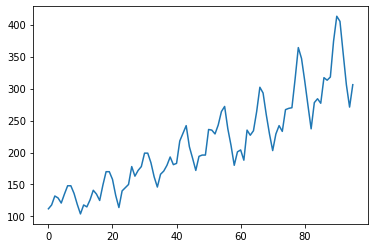

In [ ]:
#Line Plot:- [.plot()= it is going to create a Time series plot]
#Usefull for identifying TREND(increasing or decreasing & upward or downward direction)) & SEASONALITY(a.Additive= variance is constant & b.Multiplicative= variance is not constant) in our data
Airlines.Passengers.plot() 

In [ ]:
#DATA MANIPULATION:- Format my [Month] column which is present in dataset[months="%b" & year="%y"] format it & store in new column ie; called [months]
Airlines["months"] = pd.to_datetime(Airlines.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

#I want to split month seprately & year also separately from [Month] column which is present in dataset by using [date function- strift]

# month extraction:- from that [Month] column & using new (date function- strift) that means splits this function is going to do month extraction from data & store in new column[months]
Airlines["months"] = Airlines.Month.dt.strftime("%b") 
# year extraction
Airlines["year"] = Airlines.Month.dt.strftime("%Y") 

#Airlines["Day"] = Airlines.Date.dt.strftime("%d") # Day extraction
#Airlines["wkday"] = Airlines.Date.dt.strftime("%A") # weekday extraction 

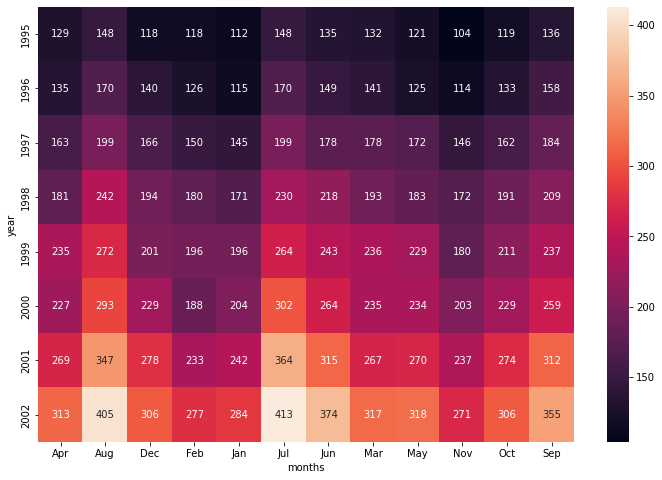

In [ ]:
#Create the Pivot table for Row= years, Column= months & Value= No. of Passengers 
#In every months & year; no. of passengers is going to be increase
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="months",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
 

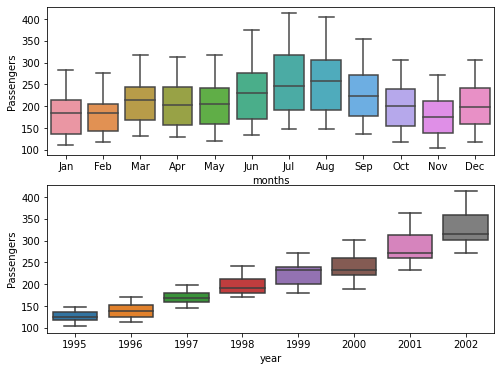

In [ ]:
#Boxplot for every month & year
#If you see passengers in month of Jan & Feb is same then it is increased in March & then decreased in April[sometimes somewhere no.of passengers has been going to increase & decrease]
#Whereas year if you see; no,of passengers has been going to happen same as month
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="months",y="Passengers",data=Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)
#So we have to go back now & using this piece of information we have to find out what are the reasons? why this is going to happen?

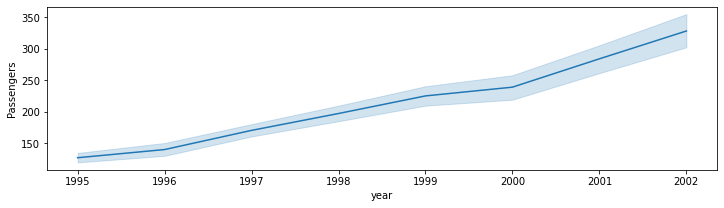

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


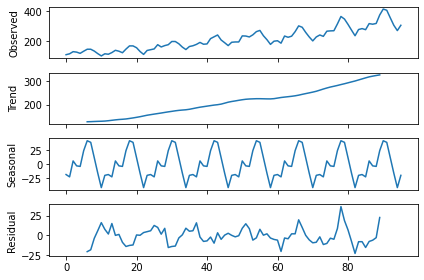

In [ ]:
#Extract underlined TREND, SEASONALITY & RESIDUAL ie; present in data
#tsa= time series analysis
#freq=12, i want 12 month frequency
#It is decomposed trend, seasonality & residuals in our data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Airlines.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

In [ ]:
#Month Extraction:- Airlines["month"] = Airlines.Month.dt.strftime("%b") 
#Year Extraction:- Airlines["year"] = Airlines.Month.dt.strftime("%Y") 
Airlines.head()

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [ ]:
#Create dummies
month_dummies = pd.DataFrame(pd.get_dummies(Airlines['months']))

In [ ]:
Airlines1 = pd.concat([Airlines,month_dummies],axis = 1)
Airlines1.head()

,Month,Passengers,months,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Create a [t] & [t_square] columns
Airlines1["t"] = np.arange(1,97)
Airlines1["t_square"] = Airlines1["t"]*Airlines1["t"]
Airlines1["log_Passengers"] = np.log(Airlines1["Passengers"])
Airlines1.columns
Airlines1.head()

,Month,Passengers,months,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


####Splitting Data

In [ ]:
Train = Airlines1.head(84)
Test = Airlines1.tail(12)  

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

53.19923653480278

In [ ]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


46.05736110315654

In [ ]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad 

48.05188897933164

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

132.81978481421817

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

26.3608176120952

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

140.06320204708632

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

10.519172544323876

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

#Whichever model is giving us least [rmse] value that is a best model to prediction among all the models
#So we have got our best model ie;MULTIPLICATIVE ADDITIVE SEASONALITY

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


####Make Prediction

In [ ]:
#Create the new dataframe for predictions of Passengers in upcomming year 2003 
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [ ]:
#Create dummies and T and T-Squared columns
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))                      
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,13)
forecast1["t_squared"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [ ]:
 #Forecast the model using Multiplicative Additive Seasonality Model on entire dataset[Airlines1]
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =Airlines1).fit()     
pred_new = pd.Series(model_full.predict(forecast1))                              
forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [ ]:
 #Final Prediction for next 12 months
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']]               
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736
